### Shortest Path in binary matrix

* $n * n$ binary matrix인 grid가 주어졌을 때, 출발지에서 목적지가지 도착하는 가장 빠른 경로의 길이를 반환하시오. 만약, 경로가 없다면 -1을 반환합니다.
* 출발지 : top-left cell
* 목적지 : bottom-right cell

- 값이 0인 cell만 지나갈 수 있습니다.
- cell끼리는 8가지 방향으로 연결되어 있습니다.(edge와 corner의 방향으로 총 8가지)
- 연결된 cell을 통해서만 지나갈 수 있습니다.

* 제약조건
* $n == grid.length$
* $n == grid[i].length$
* $1 <= n <= 100$
* $grid[i][j] i 0 or 1$

In [44]:
grid = [
    [0,0,0],
    [1,1,0],
    [1,1,0],
]
output = 4
grid2 = [
    [0,1],
    [1,0]
]
output2 = 2

In [45]:
# 문제에서 기본 제공
class Solution:
    def shortestPathBinaryMatrix(self, grid: List[List[int]]) -> int:

SyntaxError: incomplete input (3908221243.py, line 3)

In [ ]:
# 내 풀이
from collections import deque
class Solution:
    def shortestPathBinaryMatrix(self, grid: list[list[int]]) -> int:
        row = len(grid)
        col = len(grid[0])
        visited = []
        visited = [[False]*col for i in range(row)]
        count = 0
        def bfs(x,y):
            q = deque()
            q.append((x,y))
            visited[x][y] = True
            dx = [-1, 1, 0, 0, -1, -1, 1, 1]
            dy = [0, 0, -1, 1, 1, -1, -1, 1]
            count = 0
            while q:
                current_x, current_y = q.popleft()
                for i in range(8):
                    next_x = current_x + dx[i]
                    next_y = current_y + dy[i]
                    if next_x >= 0 and next_x < row and next_y >= 0 and next_y < col:
                        if grid[next_x][next_y] == 0 and not visited[next_x][next_y]:
                            visited[next_x][next_y] = True
                            q.append((next_x, next_y))
                            count += 1

        if grid[0][0] == 0:
            shortest_path = 1
            for i in range(row):
                for j in range(col):                    
                    if grid[i][j] == 0 and not visited[i][j]:                        
                        bfs(i,j)
                        shortest_path = shortest_path + count
        else:
            shortest_path = -1
        return shortest_path

In [ ]:
s = Solution
s.shortestPathBinaryMatrix(s, grid=grid2)

1

In [49]:
# 해결안
# 자료구조를 어떤 것을 가져올까?
# 암시적 그래프

In [47]:
grid3 = [
    [0,0,0,1,0,0,0],
    [0,1,1,0,0,1,0],
    [0,1,0,0,0,1,0],
    [0,0,0,1,1,1,0],
    [0,1,0,1,0,0,0],
    [0,0,0,0,1,0,0],
    [1,0,0,1,0,0,0],
]
output3 = 9
grid3

[[0, 0, 0, 1, 0, 0, 0],
 [0, 1, 1, 0, 0, 1, 0],
 [0, 1, 0, 0, 0, 1, 0],
 [0, 0, 0, 1, 1, 1, 0],
 [0, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 1, 0, 0, 0]]

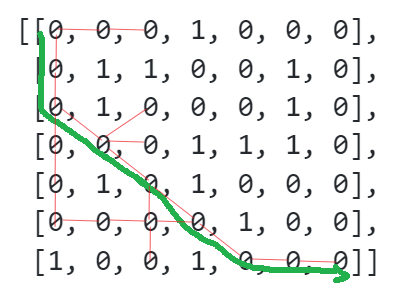

In [48]:
# 탐색이 8가지 방향으로
# shortest path binary graph = 사실 미로찾기 문제이다
# 가장 오래 걸리는 경로일 경우 = 깊이 우선 탐색
# 가장 빨리 도착하는 경로일 경우 = "BFS"

In [65]:
from collections import deque
class Solution:
    # 현재의 사각형은 직사각형이다
    def shortestPathBinaryMatrix(self, grid: list[list[int]]) -> int:
        shortest_path = -1
        
        row = col = len(grid)
        if grid[0][0] != 0 or grid[row-1][col-1] != 0:
             return shortest_path

        q = deque()
        q.append((0,0,1))
        
        visited = [[False]*col for i in range(row)]
        visited[0][0] = True
        while q:
            # 목적지에 도착했을 때, 그때의 current_len을 shortest_path에 저장
            current_row, current_col, current_len = q.popleft()
            # 목적지 (여기서 끝나는 것도 가능)
            if current_row == row -1 and current_col == col -1:
                 shortest_path = current_len
                 break
            # 연결되어 있는 vertex 확인
            delta = [(-1, 0), (1,0), (0,-1), (0,1),(-1,1), (-1,-1), (1,-1), (1,1)]
            for dx, dy in delta:
                next_row = current_row + dx
                next_col = current_col + dy                    
                if next_row >= 0 and next_row < row and next_col >= 0 and next_col < col:
                     if grid[next_row][next_col] == 0 and not visited[next_row][next_col]:
                        q.append((next_row, next_col, current_len + 1))
                        visited[next_row][next_col] = True        
        
        return shortest_path

In [66]:
s = Solution
s.shortestPathBinaryMatrix(s, grid=grid2)

2

In [70]:
from collections import deque
# 문제에서 기본 제공
class Solution:
    def shortestPathBinaryMatrix(self, grid: list[list[int]]) -> int:
        visited = []
        shortest_path = -1
        col = row = len(grid)
        visited = [[False]*col for i in range(row)]
        if grid[0][0] != 0:
            return shortest_path
        q = deque()
        q.append((0, 0, 1))
        visited[0][0] = True
        while q:
            current_r, current_c, current_len = q.popleft()
            if current_r == row -1 and current_c == col -1:
                shortest_path = current_len
                break
            delta = [(-1,0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, 1), (1, -1)]
            
            for dx, dy in delta:
                next_r = current_r + dx
                next_c = current_c + dy
                if next_r >= 0 and next_r < row and next_c >= 0 and next_c < col:
                    if grid[next_r][next_c] == 0 and not visited[next_r][next_c]:                        
                        q.append((next_r, next_c, current_len+1))
                        visited[next_r][next_c] = True
            


        return shortest_path

In [71]:
s = Solution
s.shortestPathBinaryMatrix(s, grid=grid3)

9

In [82]:
from collections import deque
# 문제에서 기본 제공
class Solution:
    def shortestPathBinaryMatrix(self, grid: list[list[int]]) -> int:
        shortestpath = -1
        if grid[0][0] != 0:
            return shortestpath
        row = col = len(grid)
        visited = []
        visited = [[False]*col for i in range(row)]
        visited[0][0] = True
        
        q = deque()
        q.append((0,0,1))

        while q:
            current_row, current_col, current_len = q.popleft()
            if current_row == row -1 and current_col == col -1:
                shortestpath = current_len
                break
            move = [(-1, 0), (1, 0), (0, -1), (0, 1), (1, 1), (1, -1), (-1, 1), (-1, -1)]
            for dx, dy in move:
                next_col = current_col + dy
                next_row = current_row + dx
                if next_col >= 0 and next_col < col and next_row >= 0 and next_row < row:
                    if grid[next_row][next_col] == 0 and not visited[next_row][next_col]:
                        q.append((next_row, next_col, current_len+1))
                        visited[next_row][next_col] = True

        return shortestpath

In [83]:
s = Solution
s.shortestPathBinaryMatrix(s, grid=grid3)

9

In [84]:
# 문제에서 기본 제공
from collections import deque
class Solution:
    def shortestPathBinaryMatrix(self, grid: list[list[int]]) -> int:
        shortest_path = -1

        row = col = len(grid)
        
        visited = []
        visited = [[False]*col for i in range(row)]
        visited[0][0] = True

        q = deque()
        q.append((0,0,1))

        if grid[0][0] != 0:
            return shortest_path
        while q:
            current_row, current_col, current_len = q.popleft()
            if current_row == row-1 and current_col == col-1:
                shortest_path = current_len
                break
            delta = [(-1, 0), (1, 0), (0, -1), (0, 1)
                     ,(-1, 1), (-1, -1), (1, 1), (1, -1)]
            for dx, dy in delta:
                next_row = current_row + dx
                next_col = current_col + dy
                if next_row >= 0 and next_row < row and next_col >= 0 and next_col < col:
                    if grid[next_row][next_col] == 0 and not visited[next_row][next_col]:
                        q.append((next_row, next_col, current_len +1))
                        visited[next_row][next_col] = True
        return shortest_path

In [85]:
s = Solution
s.shortestPathBinaryMatrix(s, grid=grid3)

9